In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

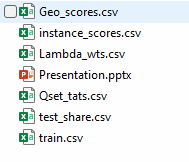

In [2]:
geo = pd.read_csv('Geo_scores.csv')
instance = pd.read_csv("instance_scores.csv")
lambdawts = pd.read_csv("Lambda_wts.csv")
qset = pd.read_csv("Qset_tats.csv")
test_data = pd.read_csv("test_share.csv")
train_data = pd.read_csv('train.csv')

In [3]:
print(geo.shape)
print()
print(instance.shape)
print()
print(lambdawts.shape)
print()
print(qset.shape)
print()
print(test_data.shape)
print()
print(train_data.shape)

(1424035, 2)

(1424035, 2)

(1400, 2)

(1424035, 2)

(56962, 27)

(227845, 28)


In [4]:
print(geo.columns)
print()
print(instance.columns)
print()
print(lambdawts.columns)
print()
print(qset.columns)
print()
print(test_data.columns)
print()
print(train_data.columns)

Index(['id', 'geo_score'], dtype='object')

Index(['id', 'instance_scores'], dtype='object')

Index(['Group', 'lambda_wt'], dtype='object')

Index(['id', 'qsets_normalized_tat'], dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT'],
      dtype='object')

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target'],
      dtype='object')


In [5]:
print("geo id", geo['id'].nunique())
print()
print("instance id", instance['id'].nunique())
print()
print("Lambda Group", lambdawts['Group'].nunique())
print()
print("qset id", qset['id'].nunique())
print()
print("Test id", test_data['id'].nunique())
print()
print("Train Id", train_data['id'].nunique())
print()
print("Test Group", test_data['Group'].nunique())
print()
print("Train Group",train_data['Group'].nunique())

geo id 284807

instance id 284807

Lambda Group 1400

qset id 284807

Test id 56962

Train Id 227845

Test Group 915

Train Group 1301


In [6]:
train_data['data'] = 'train'
test_data['data'] = 'test'

In [7]:
train_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [8]:
test_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'data'],
      dtype='object')

In [9]:
train_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0,train
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0,train
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0,train
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0,train
227844,22175,Grp143,1.006667,0.553333,0.946667,1.206667,0.406667,0.750000,0.520000,0.756667,...,0.646667,0.636667,0.683333,0.843333,0.580000,0.683333,0.676667,-235.0000,0,train


In [10]:
test_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.616667,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,test


In [11]:
all_data = pd.concat([train_data, test_data], axis=0)

In [12]:
all_data.head()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,train
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,train
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,train
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,train
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,train


In [13]:
all_data.tail()

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,data
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,NaN,test
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,NaN,test
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,NaN,test
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,NaN,test
56961,223337,Grp18,1.426667,0.110000,-0.006667,-0.200000,0.983333,1.870000,0.033333,0.963333,...,0.670000,0.770000,0.893333,0.586667,0.616667,0.683333,0.650000,-248.4500,NaN,test


In [14]:
all_data.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data'],
      dtype='object')

In [15]:
print("all_data id", all_data['id'].nunique())
print()
print("all_data group", all_data['Group'].nunique())

all_data id 284807

all_data group 1400


In [19]:
print(geo.isnull().sum())
print()
print(instance.isnull().sum())
print()
print(lambdawts.isnull().sum())
print()
print(qset.isnull().sum())
print()
print(all_data.isnull().sum())


id           0
geo_score    0
dtype: int64

id                 0
instance_scores    0
dtype: int64

Group        0
lambda_wt    0
dtype: int64

id                      0
qsets_normalized_tat    0
dtype: int64

id                    0
Group                 0
Per1                  0
Per2                  0
Per3                  0
Per4                  0
Per5                  0
Per6                  0
Per7                  0
Per8                  0
Per9                  0
Dem1                  0
Dem2                  0
Dem3                  0
Dem4                  0
Dem5                  0
Dem6                  0
Dem7                  0
Dem8                  0
Dem9                  0
Cred1                 0
Cred2                 0
Cred3                 0
Cred4                 0
Cred5                 0
Cred6                 0
Normalised_FNT        0
Target            56962
data                  0
dtype: int64


In [17]:
print(geo.describe())
print()
print(qset.describe())

                 id     geo_score
count  1.424035e+06  1.352492e+06
mean   1.424030e+05 -9.279168e-06
std    8.221673e+04  7.827199e+00
min    0.000000e+00 -1.093900e+02
25%    7.120100e+04 -5.860000e+00
50%    1.424030e+05  1.800000e-01
75%    2.136050e+05  5.860000e+00
max    2.848060e+05  4.581000e+01

                 id  qsets_normalized_tat
count  1.424035e+06          1.320834e+06
mean   1.424030e+05          1.094006e-05
std    8.221673e+04          7.731794e+00
min    0.000000e+00         -1.404400e+02
25%    7.120100e+04         -5.860000e+00
50%    1.424030e+05          2.000000e-02
75%    2.136050e+05          5.860000e+00
max    2.848060e+05          6.110000e+01


In [18]:
geo['geo_score'] = geo['geo_score'].fillna(geo['geo_score'].median())
qset['qsets_normalized_tat'] = qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [20]:
geo.shape

(1424035, 2)

In [21]:
geo['id'].nunique()

284807

In [22]:
geo = geo.groupby('id').mean()

In [23]:
geo.shape

(284807, 1)

In [24]:
geo

,geo_score
id,
0,-0.620
1,1.106
2,0.070
3,0.180
4,0.540
...,...
284802,2.710
284803,0.956
284804,0.060


In [25]:
qset = qset.groupby('id').mean()

In [26]:
qset.shape

(284807, 1)

In [27]:
instance.shape

(1424035, 2)

In [28]:
instance = instance.groupby('id').mean()

In [29]:
instance.shape

(284807, 1)

In [30]:
lambdawts.shape

(1400, 2)